# Moving averages


In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint

from utils import get_data, get_return_simulation
from strategies import sma, ema


In [2]:
PATH = "../../data/moving_averages.crypto.csv"
stocks = ['BTC-EUR', 'ETH-EUR', 'DOGE-EUR', 'ADA-EUR', 'SHIB-EUR']
weights = [0.4, 0.5, 0.023, 0.033, 0.043]


## Get stocks data


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

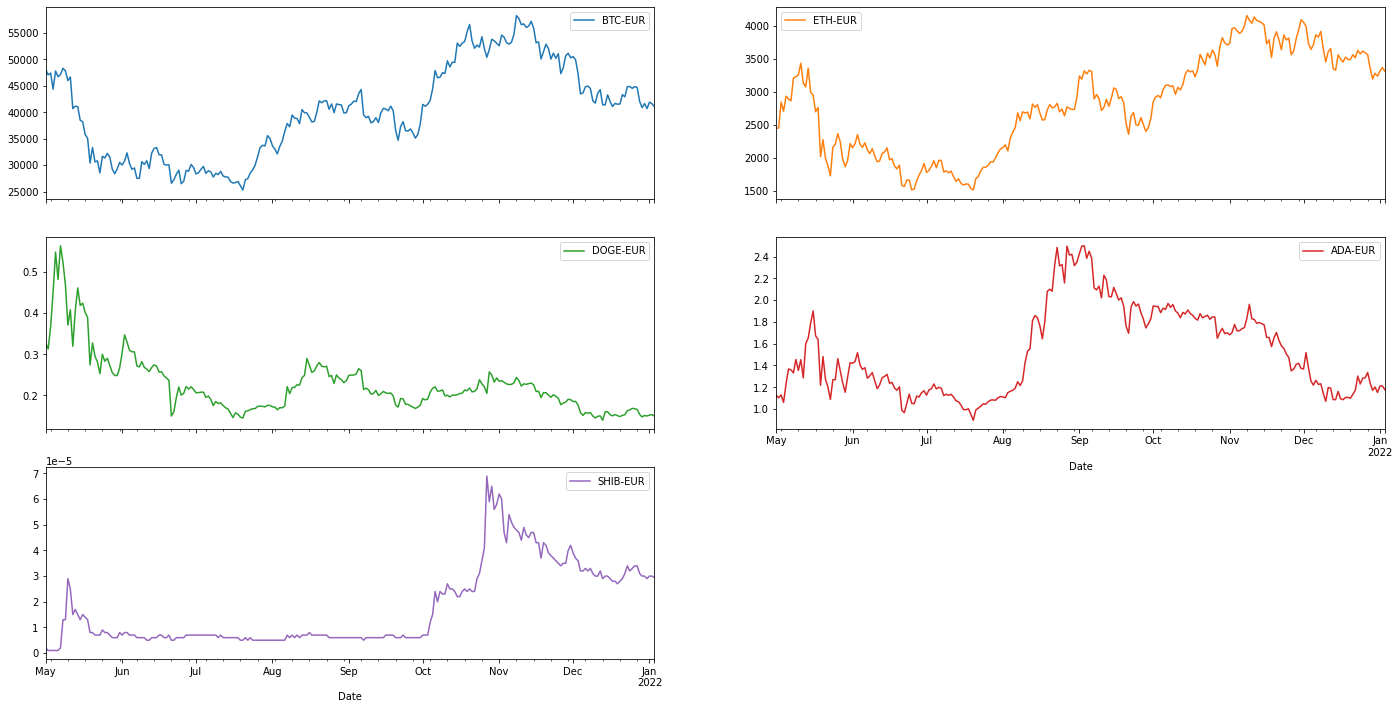

In [3]:
df = get_data(path=PATH, stocks=stocks).loc['2021-05-01':]

df.plot(figsize=(24, 12), subplots=True, layout=(3, 2))


## Example of a strategy base on 2 simple moving averages


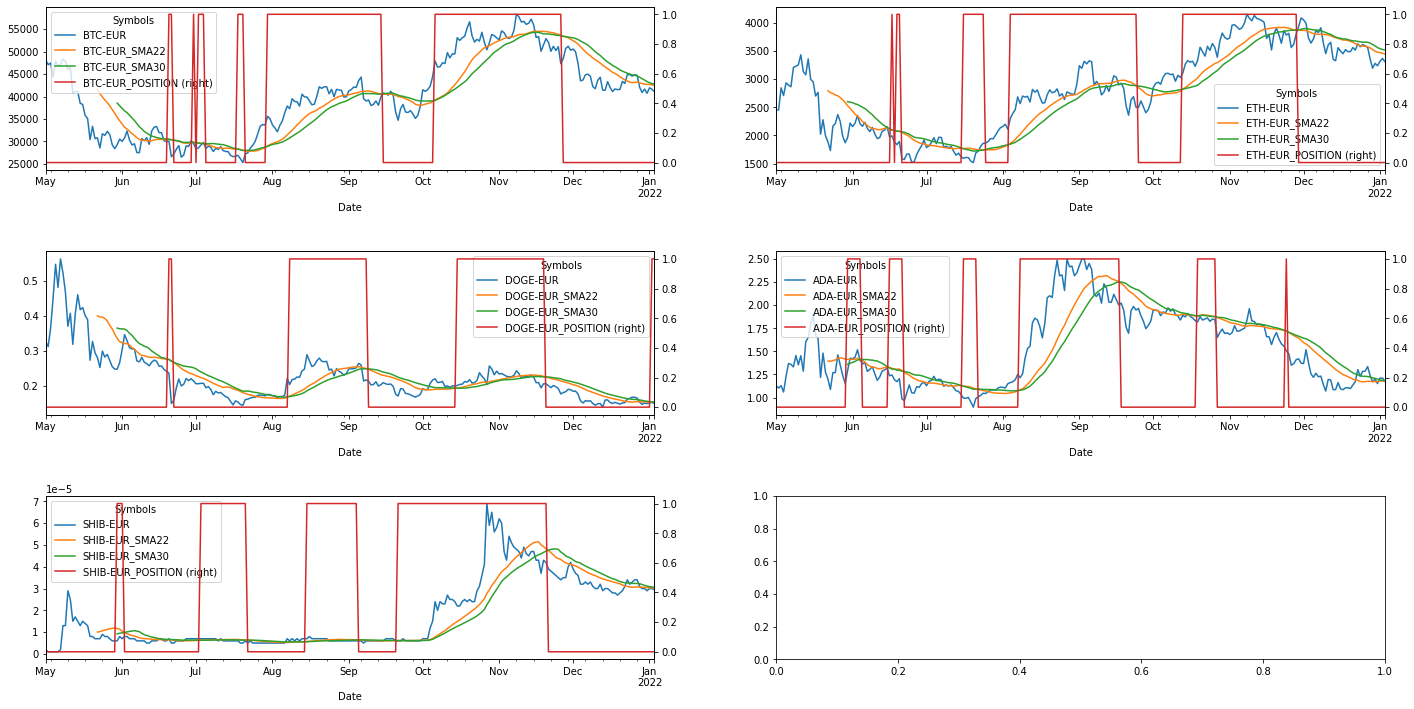

In [12]:
SMA1 = 22
SMA2 = 30

fig, axes = plt.subplots(nrows=3, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

df = sma(df, stocks, SMA1, SMA2)

for i, s in enumerate(stocks):
    df[[s, f"{s}_SMA{SMA1}", f"{s}_SMA{SMA2}", f"{s}_POSITION"]].plot(
        figsize=(24, 12), ax=axes[i // 2, i % 2], secondary_y=f"{s}_POSITION"
    )


## Compute strategy returns and compare to stock returns


{'ADA-EUR': {'amount invested': 11.122186005115509,
             'base returns': 1.0449336039407155,
             'strategy returns': 0.8460704923158966},
 'BTC-EUR': {'amount invested': 268266.9765625,
             'base returns': 0.8535048065259238,
             'strategy returns': 1.071451646539261},
 'DOGE-EUR': {'amount invested': 1.046207994222641,
              'base returns': 0.45825755046243616,
              'strategy returns': 0.7160405458893719},
 'ETH-EUR': {'amount invested': 11765.136108398438,
             'base returns': 1.3512397418689537,
             'strategy returns': 1.4074066926440483},
 'SHIB-EUR': {'amount invested': 2.8000000611427822e-05,
              'base returns': 14.691439028668752,
              'strategy returns': 5.246942382415633}}


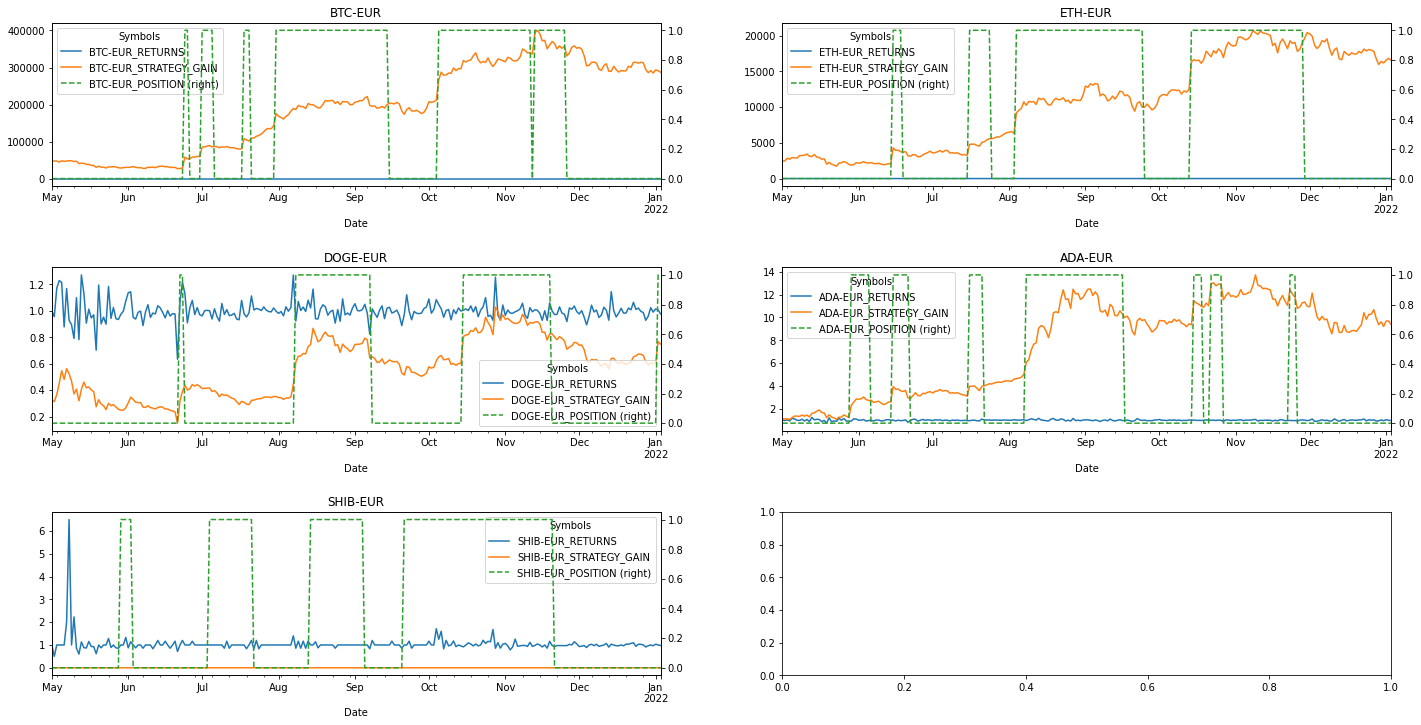

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)


pprint.pprint(get_return_simulation(df, stocks))

for i, s in enumerate(stocks):
    ax = df[[f"{s}_RETURNS", f"{s}_STRATEGY_GAIN"]].plot(
        figsize=(24, 12), ax=axes[i // 2, i % 2]
    )
    df[[f"{s}_POSITION"]].plot(
        figsize=(24, 12), ax=ax, secondary_y=f"{s}_POSITION", style="--"
    )
    plt.title(s)


## Compute best simple moving average pair


In [6]:
symbols = stocks[:-1]
results = pd.DataFrame()

data = pd.DataFrame(df[symbols])
data.dropna(inplace=True)

for SMA1 in range(2, 31):
    for SMA2 in range(SMA1 + 1, 51):
        data = sma(data, symbols, SMA1, SMA2)

        return_simulation = get_return_simulation(data, symbols)
        market = sum(
            [w * return_simulation[s]["base returns"] for s, w in zip(symbols, weights)]
        )
        strategy = sum(
            [
                w * return_simulation[s]["strategy returns"]
                for s, w in zip(symbols, weights)
            ]
        )

        results = results.append(
            pd.DataFrame(
                {
                    "SMA1": SMA1,
                    "SMA2": SMA2,
                    "market": market,
                    "strategy": strategy,
                    "out": strategy - market,
                },
                index=[0],
            ),
            ignore_index=True,
        )

results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      986 non-null    int64  
 1   SMA2      986 non-null    int64  
 2   market    986 non-null    float64
 3   strategy  986 non-null    float64
 4   out       986 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 38.6 KB


In [7]:
results.sort_values("out", ascending=False).head(7)


,SMA1,SMA2,market,strategy,out
777,22,30,1.062045,1.258918,0.196873
749,21,30,1.062045,1.255700,0.193656
719,20,29,1.062045,1.251843,0.189798
748,21,29,1.062045,1.251684,0.189640
720,20,30,1.062045,1.240920,0.178876
778,22,31,1.062045,1.240273,0.178229
658,18,29,1.062045,1.239168,0.177124


## Exponential moving averages


In [8]:
symbols = stocks[:-1]
results = pd.DataFrame()

data = pd.DataFrame(df[symbols])
data.dropna(inplace=True)

for EMA1 in range(2, 31):
    for EMA2 in range(EMA1 + 1, 51):
        data = ema(data, symbols, EMA1, EMA2)

        return_simulation = get_return_simulation(data, symbols)
        market = sum(
            [w * return_simulation[s]["base returns"] for s, w in zip(symbols, weights)]
        )
        strategy = sum(
            [
                w * return_simulation[s]["strategy returns"]
                for s, w in zip(symbols, weights)
            ]
        )

        results = results.append(
            pd.DataFrame(
                {
                    "EMA1": EMA1,
                    "EMA2": EMA2,
                    "market": market,
                    "strategy": strategy,
                    "out": strategy - market,
                },
                index=[0],
            ),
            ignore_index=True,
        )

results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EMA1      986 non-null    int64  
 1   EMA2      986 non-null    int64  
 2   market    986 non-null    float64
 3   strategy  986 non-null    float64
 4   out       986 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 38.6 KB


In [13]:
results.sort_values("out", ascending=False).head(15)


,EMA1,EMA2,market,strategy,out
176,5,41,1.062045,1.163800,0.101756
217,6,38,1.062045,1.153987,0.091942
335,9,30,1.062045,1.153594,0.091550
296,8,32,1.062045,1.153594,0.091550
257,7,35,1.062045,1.153594,0.091550
218,6,39,1.062045,1.152156,0.090112
258,7,36,1.062045,1.151764,0.089719
295,8,31,1.062045,1.151392,0.089347
372,10,27,1.062045,1.151392,0.089347
371,10,26,1.062045,1.151392,0.089347


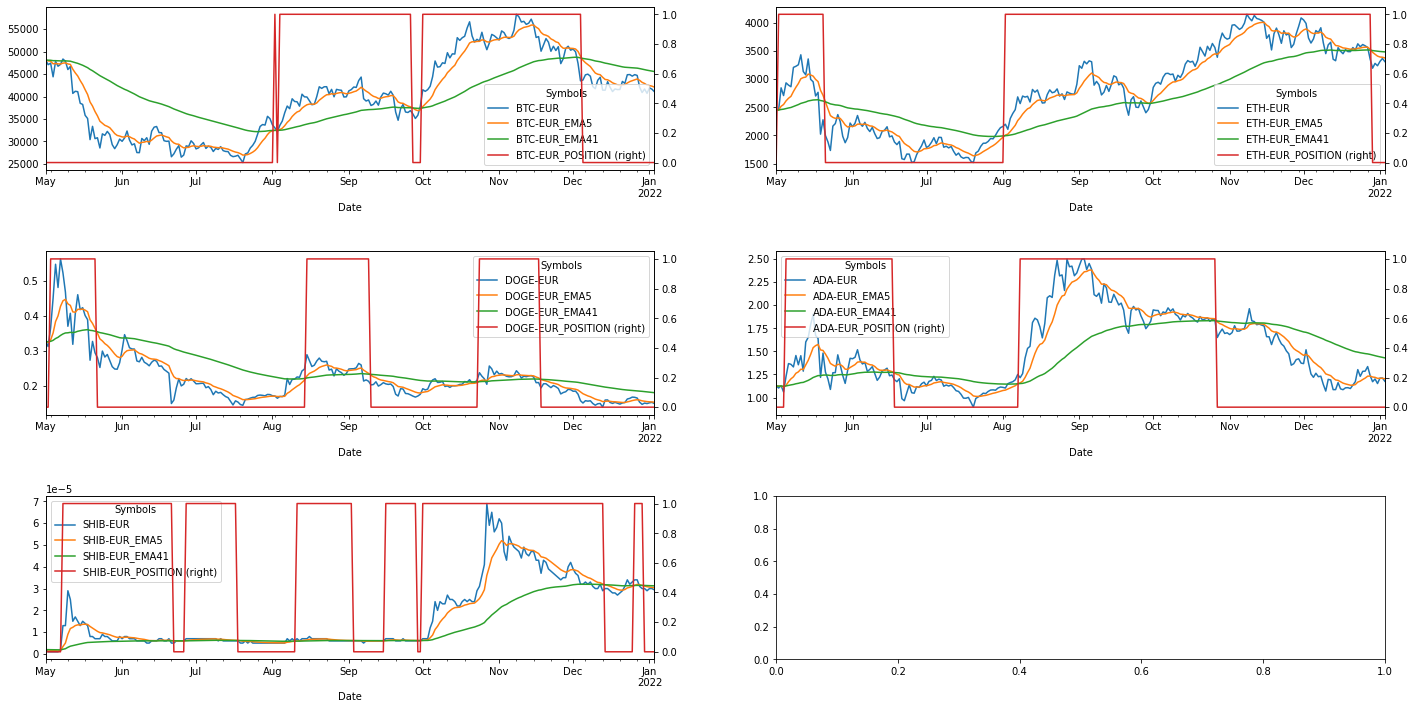

In [11]:
EMA1 = 5
EMA2 = 41

fig, axes = plt.subplots(nrows=3, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

df = ema(df, stocks, EMA1, EMA2)

for i, s in enumerate(stocks):
    df[[s, f"{s}_EMA{EMA1}", f"{s}_EMA{EMA2}", f"{s}_POSITION"]].plot(
        figsize=(24, 12), ax=axes[i // 2, i % 2], secondary_y=f"{s}_POSITION"
    )


## Conclusion

- We did not find a SMA pair that consistently have higher returns than staying in the market
- In the method to find the best pair, all stocks were equally weighted
- SMA cannot be used for buy/sell signals by itself
- EMA produce more profitable signals than SMA

- Try with 3 SMA to generate signal